In [1]:
import pandas as pd
import seaborn as sns

/home/rick/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ratings = pd.read_pickle('ratings_processed.pkl')

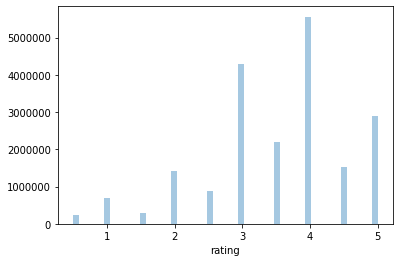

In [3]:
sns.distplot(ratings['rating'], kde=False)

In [4]:
movie_value_counts = ratings['movieId'].value_counts().rename('ratings_of_movieId')

In [6]:
user_value_counts = ratings['userId'].value_counts()

In [7]:
ratings

,userId,movieId,rating,timestamp
0,1,0,3.5,2005-04-02 23:53:47
1,1,1,3.5,2005-04-02 23:31:16
2,1,2,3.5,2005-04-02 23:33:39
3,1,3,3.5,2005-04-02 23:32:07
4,1,4,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,1814,4.5,2009-11-13 15:42:00
20000259,138493,1037,4.5,2009-12-03 18:31:48
20000260,138493,3950,3.0,2009-12-07 18:10:57
20000261,138493,1818,5.0,2009-11-13 15:42:24


In [9]:
df1 = ratings.merge(movie_value_counts, left_on = 'movieId', right_index=True)

In [11]:
df2 = df1[df1['ratings_of_movieId'] > 6]

In [15]:
df2 = df2.reset_index()

In [16]:
df2[['userId', 'movieId', 'rating', 'ratings_of_movieId']]

,userId,movieId,rating,ratings_of_movieId
0,1,0,3.5,22243
1,5,0,3.0,22243
2,13,0,3.0,22243
3,29,0,3.0,22243
4,34,0,3.0,22243
...,...,...,...,...
19976007,114406,25025,1.0,7
19976008,123297,25025,5.0,7
19976009,130622,25025,2.5,7
19976010,134567,25025,0.5,7


In [22]:
movie_ids_unique = df2['movieId'].unique()

In [23]:
movie_ids_unique_ls = list(movie_ids_unique)

In [24]:
def process_movie_id(old_id):
    return movie_ids_unique_ls.index(old_id)

In [25]:
df2['movieId'] = df2['movieId'].apply(process_movie_id)

In [26]:
df2

,index,userId,movieId,rating,timestamp,ratings_of_movieId
0,0,1,0,3.5,2005-04-02 23:53:47,22243
1,451,5,0,3.0,1996-12-25 15:26:09,22243
2,1501,13,0,3.0,1996-11-27 08:19:02,22243
3,3326,29,0,3.0,1996-06-23 20:36:14,22243
4,3904,34,0,3.0,1996-10-28 13:29:44,22243
...,...,...,...,...,...,...
19976007,16534185,114406,16871,1.0,2011-08-05 09:41:02,7
19976008,17829483,123297,16871,5.0,2011-10-08 18:40:13,7
19976009,18865697,130622,16871,2.5,2011-08-04 07:06:37,7
19976010,19444029,134567,16871,0.5,2011-08-10 05:51:12,7


In [1]:
def re_index_column(df, columname):
    unique_values = list(df[columname].unique())
    
    def process_movie_id(old_id):
        return unique_values.index(old_id)
    
    df[columname] = df[columname].apply(process_movie_id)

In [27]:
df2.to_pickle('df.pkl')

In [33]:
df2['movieId'].nunique()

16872

In [35]:
df2['userId'].nunique()

138493

In [36]:
len(df2)

19976012

In [67]:
ratings_value_counts[ratings_value_counts < 7].index

Int64Index([18849, 20642,  7734, 20118, 14039, 20442, 18676, 12621, 20565,
            20700,
            ...
            22598, 22596, 26441, 26440, 22619, 22618, 26447, 26446, 22616,
            20809],
           dtype='int64', length=9872)

In [75]:
ratings['movie_rated_6times'] = ratings['movieId'].isin(ratings_value_counts[ratings_value_counts > 5].index)

In [76]:
ratings[ratings['movie_rated_6times']]

,userId,movieId,rating,timestamp,movie_rated_7times,movie_rated_6times
0,1,0,3.5,2005-04-02 23:53:47,True,True
1,1,1,3.5,2005-04-02 23:31:16,True,True
2,1,2,3.5,2005-04-02 23:33:39,True,True
3,1,3,3.5,2005-04-02 23:32:07,True,True
4,1,4,3.5,2005-04-02 23:29:40,True,True
...,...,...,...,...,...,...
20000258,138493,1814,4.5,2009-11-13 15:42:00,True,True
20000259,138493,1037,4.5,2009-12-03 18:31:48,True,True
20000260,138493,3950,3.0,2009-12-07 18:10:57,True,True
20000261,138493,1818,5.0,2009-11-13 15:42:24,True,True


In [58]:
ratings_value_counts[ratings_value_counts > 9]

11       67310
369      66172
12       63366
17       63299
182      59715
         ...  
14025       10
15976       10
13725       10
17543       10
18230       10
Name: movieId, Length: 15451, dtype: int64

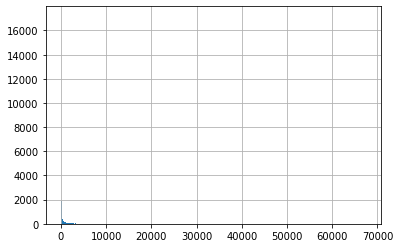

In [46]:
ratings_value_counts.hist(bins=1000)

In [44]:
ratings_value_counts[22618]

1